# Import Section

In [ ]:
# mounting drive
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/final-project')

!pip install catboost
!pip install scikit-learn-extra

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00


In [ ]:
# import package and library
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime as dt
from ast import literal_eval
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import learning_curve
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve as lrc

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

In [ ]:
# import dataset
customer = pd.read_csv('customer.csv')
product = pd.read_csv('product.csv', on_bad_lines='skip')
transactions = pd.read_csv('transactions.csv')

In [ ]:
click = pd.read_csv('click_stream.csv')

In [ ]:
# import dataset (20%)
"""customer = pd.read_csv('customer.csv', skiprows=lambda x: x > 0 and random.random() >=0.20)
product = pd.read_csv('product.csv', skiprows=lambda x: x > 0 and random.random() >=0.20, on_bad_lines='skip')
transactions = pd.read_csv('transactions.csv', skiprows=lambda x: x > 0 and random.random() >=0.20)
click = pd.read_csv('click-press.csv', skiprows=lambda x: x > 0 and random.random() >=0.20)"""

"customer = pd.read_csv('customer.csv', skiprows=lambda x: x > 0 and random.random() >=0.20)\nproduct = pd.read_csv('product.csv', skiprows=lambda x: x > 0 and random.random() >=0.20, on_bad_lines='skip')\ntransactions = pd.read_csv('transactions.csv', skiprows=lambda x: x > 0 and random.random() >=0.20)\nclick = pd.read_csv('click-press.csv', skiprows=lambda x: x > 0 and random.random() >=0.20)"

# Understanding Data

In [ ]:
dInfo = [customer, product, transactions]
for i, v in enumerate(dInfo):
  print(f'Dataset Info {i+1}'.center(50, '='))
  print(v.info())

==================Dataset Info 1==================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-nul

In [ ]:
customer.head(3)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23


In [ ]:
product.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [ ]:
transactions.head(3)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696


In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
click.head(10)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01T12:07:00.322763Z,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'}
6,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:08:27.322763Z,365b3840-9647-4bf5-917f-f0bec3d05332,MOBILE,NaN
7,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:09:49.322763Z,1a1e3548-108e-4520-bf04-1b01d43a72cb,MOBILE,NaN
8,7d440441-e67a-4d36-b324-80ffd636d166,SCROLL,2019-09-01T12:11:06.322763Z,f7246095-b094-46c1-b2ac-bcfd080146c3,MOBILE,NaN
9,7d440441-e67a-4d36-b324-80ffd636d166,ITEM_DETAIL,2019-09-01T12:12:19.322763Z,74a000dc-b931-4c59-abcc-02e991623bc1,MOBILE,NaN


# Data Cleaning

## Finding Missing Values

In [ ]:
customer.isna().sum().sort_values(ascending=False)

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
product.isna().sum().sort_values(ascending=False)

usage                 317
season                 21
baseColour             15
productDisplayName      7
year                    1
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
dtype: int64

In [ ]:
transactions.isna().sum().sort_values(ascending=False)

promo_code                526048
created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
dtype: int64

In [ ]:
click.isna().sum().sort_values(ascending=False)

event_metadata    8544062
session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
dtype: int64

## Handling Missing Values


### Product

In [ ]:
null_product = product[['usage', 'season', 'baseColour', 'productDisplayName']]
null_product.head()

,usage,season,baseColour,productDisplayName
0,Casual,Fall,Navy Blue,Turtle Check Men Navy Blue Shirt
1,Casual,Summer,Blue,Peter England Men Party Blue Jeans
2,Casual,Winter,Silver,Titan Women Silver Watch
3,Casual,Fall,Black,Manchester United Men Solid Black Track Pants
4,Casual,Summer,Grey,Puma Men Grey T-shirt


In [ ]:
# handle product missing values
for col in null_product:
  product[col].replace(np.nan, 'other', inplace=True)

# fill year missing values with mode
product.year.replace(np.nan, product.year.mode()[0], inplace=True)

product.isna().sum().sort_values(ascending=False)

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [ ]:
product['year'] = product['year'].astype(int)
product['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 44424 entries, 0 to 44423
Series name: year
Non-Null Count  Dtype
--------------  -----
44424 non-null  int64
dtypes: int64(1)
memory usage: 347.2 KB


### Transaction

In [ ]:
transactions.promo_code.unique()

array(['WEEKENDSERU', nan, 'WEEKENDMANTAP', 'AZ2022', 'LIBURDONG',
       'BUYMORE', 'XX2022', 'STARTUP', 'SC2022'], dtype=object)

In [ ]:
transactions['promo_code'].replace(np.nan, 'none', inplace=True)
transactions.promo_code.value_counts()

none             526048
AZ2022            89227
BUYMORE           66835
WEEKENDSERU       61941
XX2022            44744
LIBURDONG         20965
WEEKENDMANTAP     20448
SC2022            11271
STARTUP           11105
Name: promo_code, dtype: int64

In [ ]:
transactions['promo_code'].isna().sum()

0

In [ ]:
# split product_metadata column
transactions['product_metadata'] = transactions['product_metadata'].apply(literal_eval)

In [ ]:
transactions = transactions.explode('product_metadata')

In [ ]:
transactions[list(transactions["product_metadata"].head(1).tolist()[0].keys())] = transactions["product_metadata"].apply(lambda x: pd.Series([x[key] for key in x.keys()]))

In [ ]:
transactions.drop(columns='product_metadata', inplace=True)

In [ ]:
transactions.sample(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
439994,2022-01-07T12:32:09.209023Z,67210,2fd4c5b9-357c-4e99-a093-ca34e8b180f8,c3747485-e99f-45dc-a6f9-ab760afccb25,Gopay,Success,2630,BUYMORE,10000,2022-01-12T09:32:20.214816Z,-1.736629,115.086442,520222,6552,1,205784
204715,2019-08-10T20:46:28.331587Z,40024,87d4eb79-5b50-4f87-92d9-d25e251e232c,f336e680-9a2a-4502-ac9f-8ce8f0c0fb32,Credit Card,Success,0,none,10000,2019-08-15T01:17:05.117993Z,-1.410992,101.054375,175069,17934,1,165069
754173,2021-09-06T02:55:55.550771Z,76024,1e8d355c-ee42-48b4-b6bf-f1083e43d501,3d3ad5fd-1208-4aff-9f29-af233af7217c,Debit Card,Success,0,none,0,2021-09-11T06:05:00.090901Z,-6.169158,106.729689,152434,7639,1,152434
802648,2019-08-29T11:10:19.495357Z,44508,b821d9db-4bbd-4669-9b59-8bd47146fdd0,c93a7bd0-c8fb-4935-bf7a-d5ad836e5757,Credit Card,Success,0,none,10000,2019-09-03T00:22:54.170064Z,-7.021031,111.545976,260007,39338,1,250007
285085,2018-06-09T16:50:38.848174Z,85426,0a788fe3-09af-43c9-9467-5a06e6e7cbd3,11621cd6-a4e0-4c85-be71-54625daf153c,OVO,Success,5961,WEEKENDMANTAP,10000,2018-06-10T18:40:17.155594Z,-7.134228,108.957935,7780692,31782,1,362840


### Click Stream

In [ ]:
click['event_time'] = pd.to_datetime(click['event_time'])

In [ ]:
# Getting values for purchase date, year and Month
click['event_time_year'] = click['event_time'].apply(lambda x: x.year)
click['event_time_month'] = click['event_time'].apply(lambda x: x.month)
click['event_time_date'] = click['event_time'].apply(lambda x: x.strftime('%d'))
click['event_time_month_name'] = click['event_time'].apply(lambda x: x.strftime('%b'))
click['event_time_full_date'] = click['event_time'].apply(lambda x: x.date)
click['event_time_dayofweek_name'] = click['event_time'].apply(lambda x: x.strftime('%a'))

In [ ]:
# getting hours values
click['event_time_hour'] = click['event_time'].apply(lambda x: x.hour)

In [ ]:
# get day base on hour
def get_day(hour):
    if 0 <= hour < 5:
        return 'night'
    elif 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

click['event_time_day'] = click['event_time_hour'].apply(get_day)

In [ ]:
click_drop = click[['event_time', 'event_metadata']]
click.drop(columns=click_drop, inplace=True)

## Handling Outliers

### customer

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
# make customer fullname column
customer['fullname'] = customer['first_name'] + " " + customer['last_name']
customer.drop(columns=['first_name', 'last_name'], inplace=True)

In [ ]:
# insert fullname
pop_fullname = customer.pop('fullname')
customer.insert(1, 'full_name', pop_fullname)

In [ ]:
customer.sample(3)

,customer_id,full_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
67238,18254,Jaya Simbolon,e7e3feae-80f7-4c08-9f02-73906956a574,e7e3feae_80f7_4c08_9f02_73906956a574@startupca...,M,2003-07-06,Android,d3925a5a-d2ca-4832-850c-d8d185dfe4d3,Android 4.4.3,-6.205802,106.823437,Jakarta Raya,Indonesia,2022-06-12
74999,99863,Humaira Hastuti,d81d594e-bc75-4a5c-a4b0-43d7fe47ef5b,d81d594e_bc75_4a5c_a4b0_43d7fe47ef5b@startupca...,F,2003-01-21,iOS,e314177d-3be6-4262-a0c3-5a8b0ed4e8f1,iPad; CPU iPad OS 5_1_1 like Mac OS X,-6.282878,106.788995,Jakarta Raya,Indonesia,2020-04-18
87600,33699,Kania Handayani,478758b2-4b88-4ad4-9147-3fceb655bc12,478758b2_4b88_4ad4_9147_3fceb655bc12@startupca...,F,1996-11-15,Android,55243a81-2715-4fc5-9812-04d03b46f510,Android 2.3.7,-2.860063,114.883884,Kalimantan Selatan,Indonesia,2017-09-25


In [ ]:
# merubah tipe data
customer['birthdate'] = pd.to_datetime(customer['birthdate'])
customer['first_join_date'] = pd.to_datetime(customer['first_join_date'])

In [ ]:
customer['birth_year'] = customer['birthdate'].apply(lambda x: x.year)

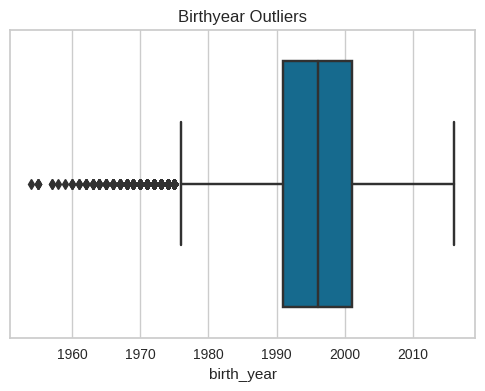

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=customer['birth_year'], showfliers=True)
plt.title('Birthyear Outliers')
plt.show()

In [ ]:
# make function to detect Q1, Q3, and IQR
def outlier_detection(datacolumn):
  Q1,Q3 = np.percentile(datacolumn, [25,75])
  IQR = Q3 - Q1
  lowerbound = Q1 - (1.5 * IQR)
  upperbound = Q3 + (1.5 * IQR)
  return lowerbound, upperbound

In [ ]:
# handling outlier in birth_year column
lowerbound, upperbound = outlier_detection(customer.birth_year)
customer.drop(customer[(customer.birth_year < lowerbound) | (customer.birth_year > upperbound)].index, inplace = True)


### Transactions

In [ ]:
transactions['created_at'] = pd.to_datetime(transactions['created_at'])
transactions['shipment_date_limit'] = pd.to_datetime(transactions['shipment_date_limit'])

In [ ]:
transactions['date_created'] = transactions['created_at'].apply(lambda x: x.date)
transactions['shipment_limit_date'] = transactions['shipment_date_limit'].apply(lambda x: x.date)

In [ ]:
transactions_drop = transactions[['created_at', 'shipment_date_limit']]
transactions.drop(columns=transactions_drop, inplace=True)

In [ ]:
# re arrange
pop_date_created = transactions.pop('date_created')
transactions.insert(0, 'created_date', pop_date_created)

pop_shipment = transactions.pop('shipment_limit_date')
transactions.insert(8, 'shipment_limit_date', pop_shipment)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 852583
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_date            1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  object 
 8   shipment_limit_date     1254585 non-null  object 
 9   shipment_fee            1254585 non-null  int64  
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qua

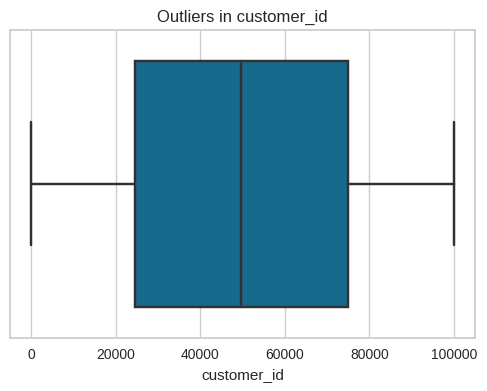

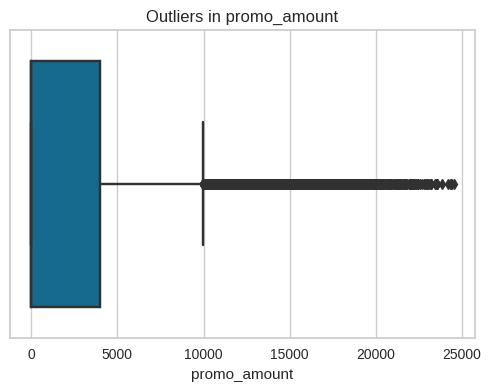

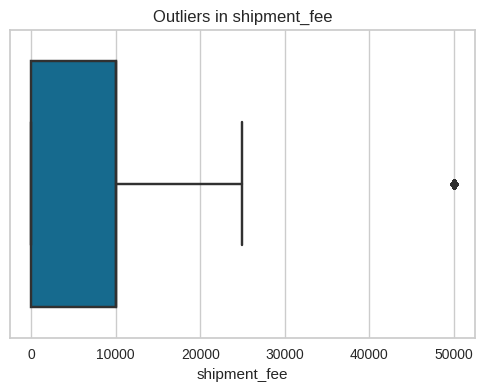

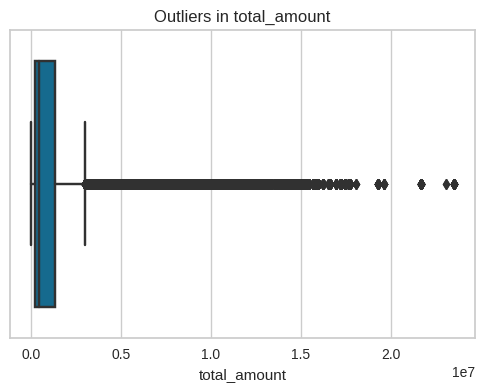

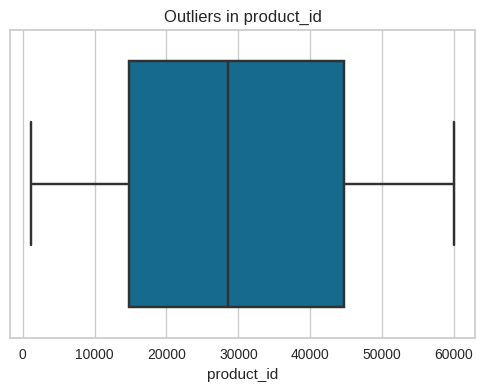

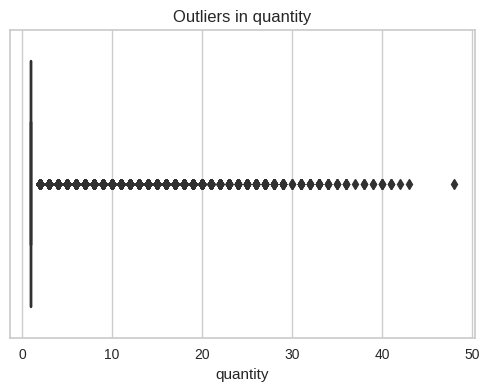

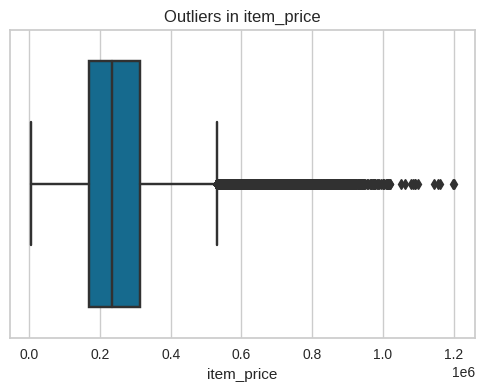

In [ ]:
transactions_numeric = transactions.select_dtypes(include=int)

for col in transactions_numeric:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=transactions_numeric[col], showfliers=True)
  plt.title(f'Outliers in {col}')
  plt.show()

In [ ]:
# make function to detect Q1, Q3, and IQR
def outlier_detection(datacolumn):
  Q1,Q3 = np.percentile(datacolumn, [25,75])
  IQR = Q3 - Q1
  lowerbound = Q1 - (1.5 * IQR)
  upperbound = Q3 + (1.5 * IQR)
  return lowerbound, upperbound

In [ ]:
# handling outlier in shipment_fee column
lowerbound, upperbound = outlier_detection(transactions.shipment_fee)
transactions.drop(transactions[(transactions.shipment_fee < lowerbound) | (transactions.shipment_fee > upperbound)].index, inplace = True)

# handling outlier in quantity column
lowerbound, upperbound = outlier_detection(transactions.quantity)
transactions.drop(transactions[(transactions.quantity < lowerbound) | (transactions.quantity > upperbound)].index, inplace = True)

### Product

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44424 non-null  int64 
 1   gender              44424 non-null  object
 2   masterCategory      44424 non-null  object
 3   subCategory         44424 non-null  object
 4   articleType         44424 non-null  object
 5   baseColour          44424 non-null  object
 6   season              44424 non-null  object
 7   year                44424 non-null  int64 
 8   usage               44424 non-null  object
 9   productDisplayName  44424 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.4+ MB


In [ ]:
product = product.rename(columns={'year':'product_year'})

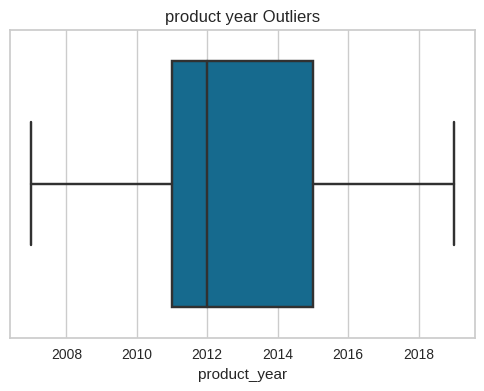

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=product['product_year'], showfliers=True)
plt.title('product year Outliers')
plt.show()

### click stream

In [ ]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   session_id                 object
 1   event_name                 object
 2   event_id                   object
 3   traffic_source             object
 4   event_time_year            int64 
 5   event_time_month           int64 
 6   event_time_date            object
 7   event_time_month_name      object
 8   event_time_full_date       object
 9   event_time_dayofweek_name  object
 10  event_time_hour            int64 
 11  event_time_day             object
dtypes: int64(3), object(9)
memory usage: 1.1+ GB


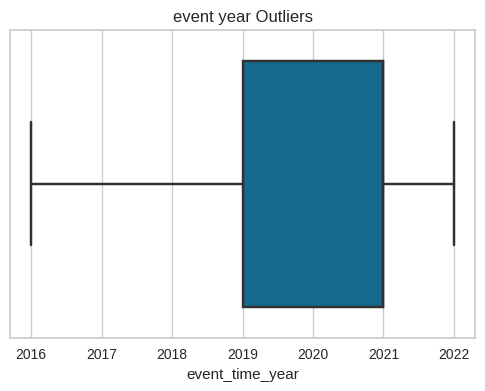

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=click['event_time_year'], showfliers=True)
plt.title('event year Outliers')
plt.show()

# Columns correlation

## customer

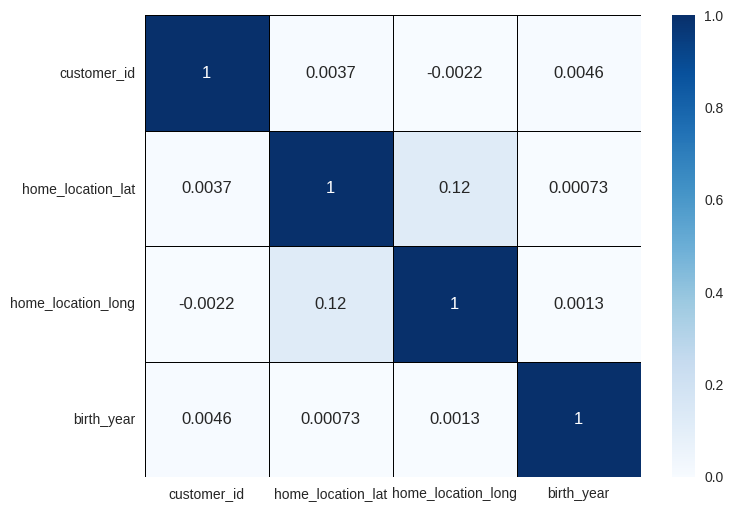

In [ ]:
# split numeric cols
customer_numeric = customer.select_dtypes(include=['int', 'float'])

# see correlation
correlation = customer_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation ,annot=True, linewidth = 0.5, linecolor = 'Black',cmap = 'Blues')
plt.show()

## Transactions

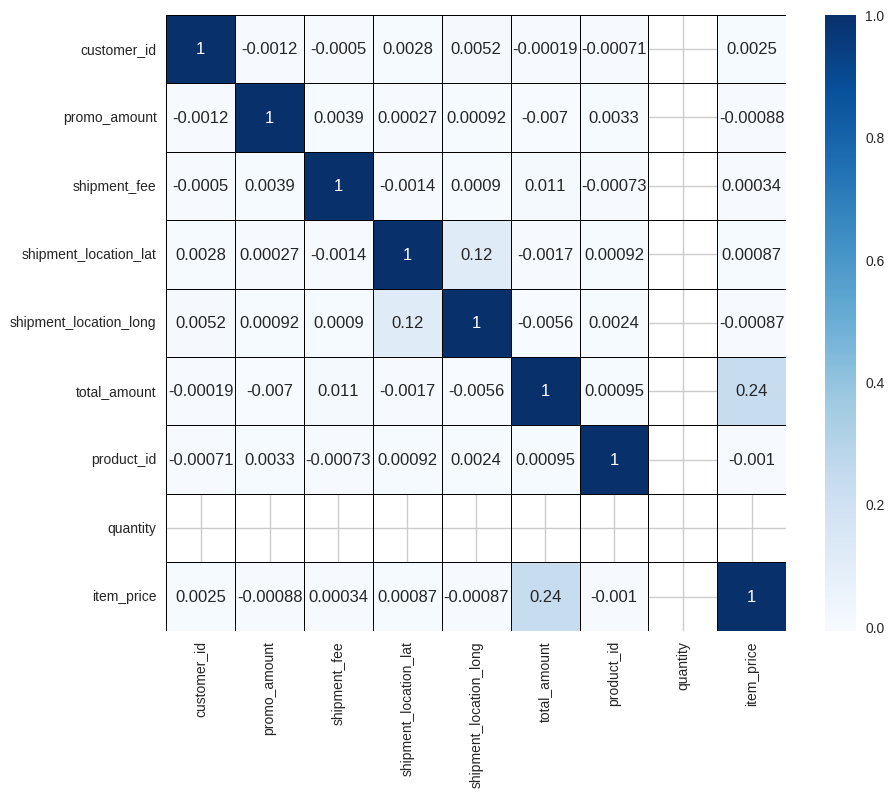

In [ ]:
# split numeric
transactions_numeric = transactions.select_dtypes(include=['int', 'float'])

# mapping correlation
correlation = transactions_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation ,annot=True, linewidth = 0.5, linecolor = 'Black',cmap = 'Blues')
plt.show()

## product

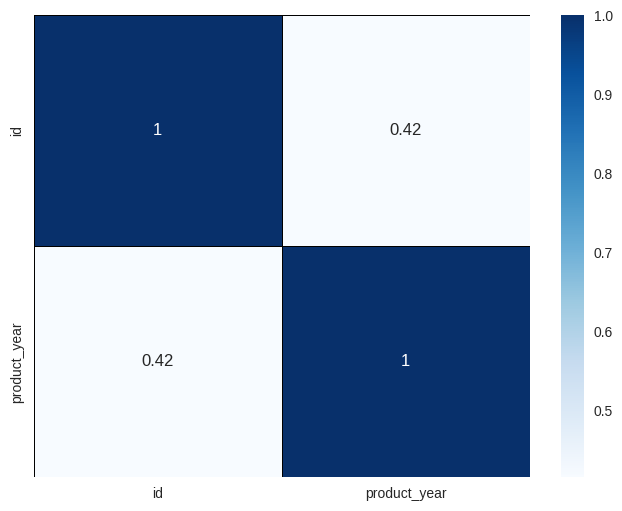

In [ ]:
# split numeric
product_numeric = product.select_dtypes(include=['int', 'float'])

# mapping corr
correlation = product_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation ,annot=True, linewidth = 0.5, linecolor = 'Black',cmap = 'Blues')
plt.show()

## click stream

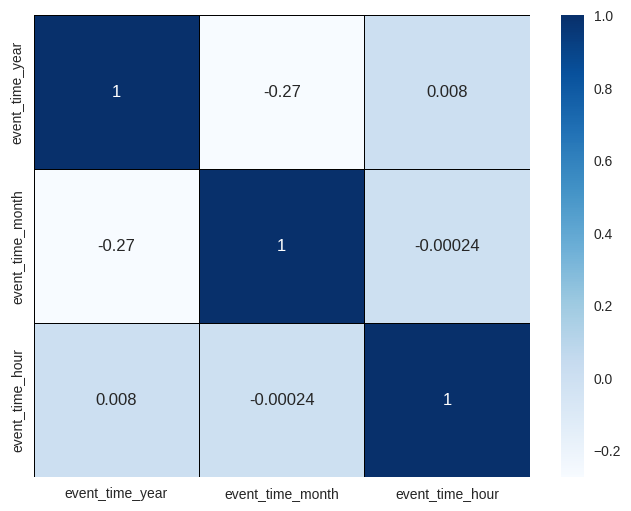

In [ ]:
# split numeric
click_numeric = click.select_dtypes(include=['int', 'float'])

# mapping corr
correlation = click_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation ,annot=True, linewidth = 0.5, linecolor = 'Black',cmap = 'Blues')
plt.show()

# Duplicated values

In [ ]:
# customer
cust_duplicated = customer[customer.duplicated()]
cust_duplicated

,customer_id,full_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,birth_year


In [ ]:
# transactions
trans_duplicated = transactions[transactions.duplicated()]
trans_duplicated

,created_date,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_limit_date,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price


In [ ]:
# product
prod_duplicated = product[product.duplicated()]
prod_duplicated

,id,gender,masterCategory,subCategory,articleType,baseColour,season,product_year,usage,productDisplayName


In [ ]:
# click
click_duplicated = click[click.duplicated()]
click_duplicated

,session_id,event_name,event_id,traffic_source,event_time_year,event_time_month,event_time_date,event_time_month_name,event_time_full_date,event_time_dayofweek_name,event_time_hour,event_time_day


# Exploratory Data Analysis

## Customer birthyear distribution

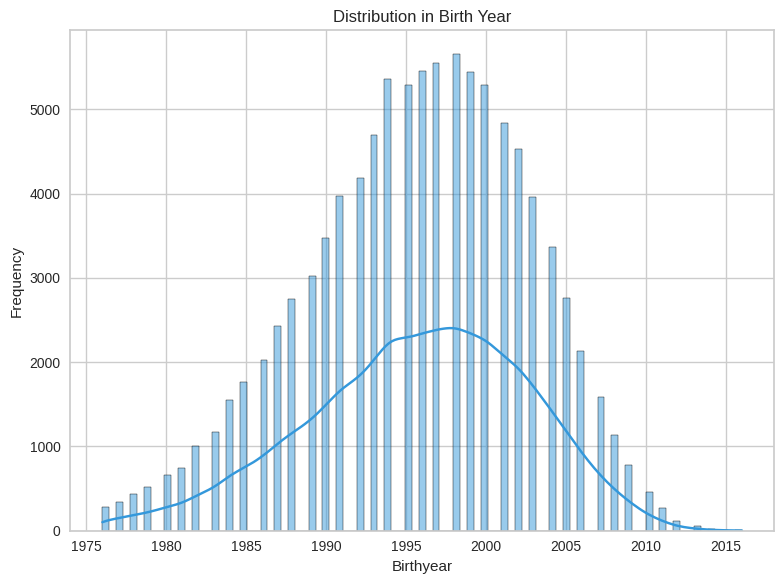

In [ ]:
plt.figure(figsize=(8,6))

sns.histplot(customer['birth_year'], kde=True, color='#3498db')
plt.title(f'Distribution in Birth Year')
plt.xlabel('Birthyear')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Birthyear memiliki distribusi yang mendekati normal.

## Transactions data distribution

In [ ]:
trans_des = transactions.describe()
trans_des

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
count,788161.000000,788161.000000,788161.000000,788161.000000,788161.000000,7.881610e+05,788161.000000,788161.0,7.881610e+05
mean,49852.924423,2041.093266,7816.594579,-5.113331,110.955705,4.508261e+05,29702.075997,1.0,2.500873e+05
std,28997.709439,3066.099907,5756.832689,3.081055,6.396760,4.697322e+05,17050.425293,0.0,1.119299e+05
min,3.000000,0.000000,0.000000,-10.995516,95.030728,1.089800e+04,1163.000000,1.0,5.600000e+03
25%,24602.000000,0.000000,0.000000,-7.377791,106.863646,1.995070e+05,14785.000000,1.0,1.684860e+05
50%,49619.000000,0.000000,10000.000000,-6.241688,110.163854,2.951920e+05,28606.000000,1.0,2.336760e+05
75%,74973.000000,3992.000000,10000.000000,-3.090220,113.177979,4.838930e+05,44687.000000,1.0,3.137440e+05
max,99999.000000,24519.000000,25000.000000,5.852327,141.006140,5.654725e+06,60000.000000,1.0,1.200357e+06


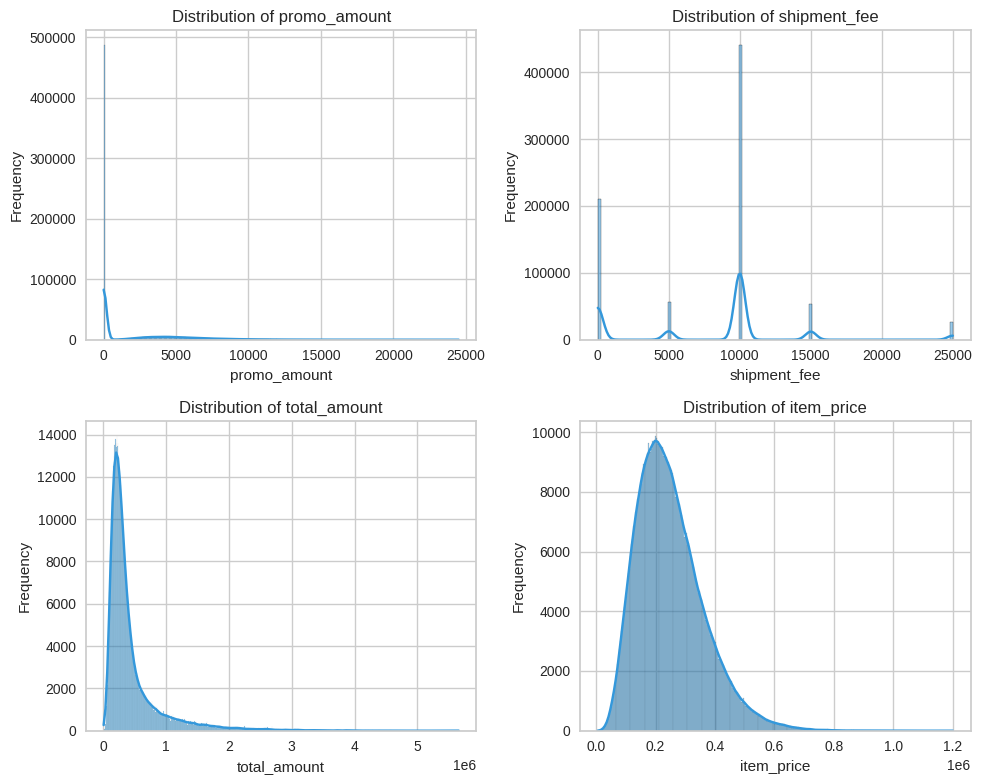

In [ ]:
trans_dis = transactions[['promo_amount', 'shipment_fee', 'total_amount', 'item_price']]
plt.figure(figsize=(10, 8))

for i, column in enumerate(trans_dis.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(trans_dis[column], kde=True, color='#3498db')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

promo_amount, shipment_fee, total_amount, dan item_price memiliki distribusi yang miring ke kanan (positive skewed). Namun, distribusi pada shipment_fee bersifat multimodal karena memiliki banyak puncak, sedangkan distribusi lainnya bersifat unimodal.

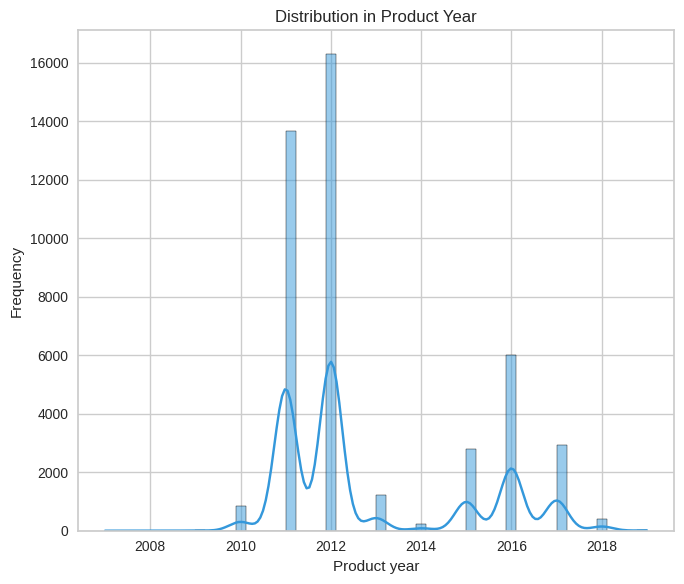

In [ ]:
plt.figure(figsize=(7,6))

sns.histplot(product['product_year'], kde=True, color='#3498db')
plt.title(f'Distribution in Product Year')
plt.xlabel('Product year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Distribusi pada product_year mendekati distribusi normal yang bersifat multimodal.

## Gender comparison

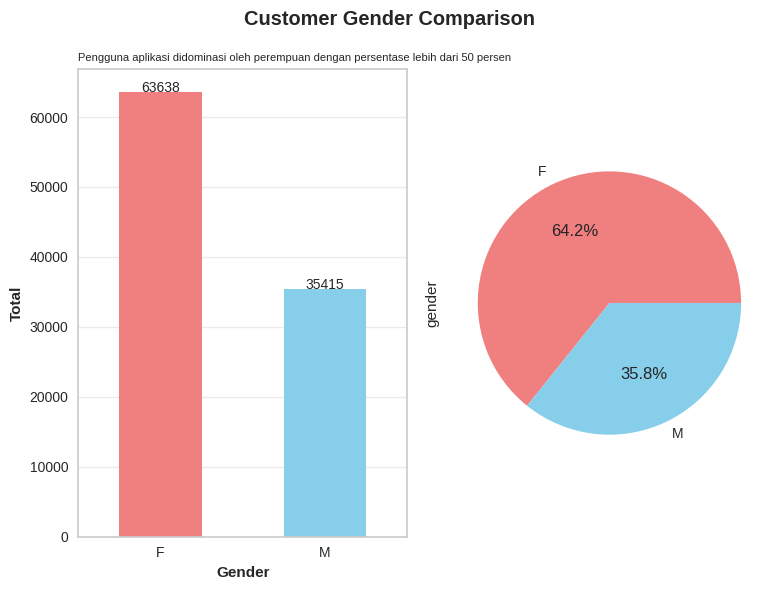

In [ ]:
# Menghitung total masing-masing gender
gender_counts = customer['gender'].value_counts()
#print(gender_counts)

# Menghitung persentase masing-masing gender
gender_percentages = customer['gender'].value_counts(normalize=True) * 100
#print(gender_percentages)

# Menampilkan hasil dalam bentuk grafik
plt.figure(figsize=(8, 6))

# Plot bar chart untuk total gender
plt.subplot(1, 2, 1)
chart = gender_counts.plot(kind='bar', color=['lightcoral', 'skyblue'])

for rect in chart.patches:
    chart.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+2,rect.get_height(),
             horizontalalignment='center', fontsize=10)

plt.suptitle('Customer Gender Comparison ', fontweight='heavy')
plt.title('Pengguna aplikasi didominasi oleh perempuan dengan persentase lebih dari 50 persen', fontsize='8', loc='left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Total', fontweight='bold')

# Plot pie chart untuk persentase gender
plt.subplot(1, 2, 2)
gender_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])

plt.tight_layout()
plt.show()

## Device Type

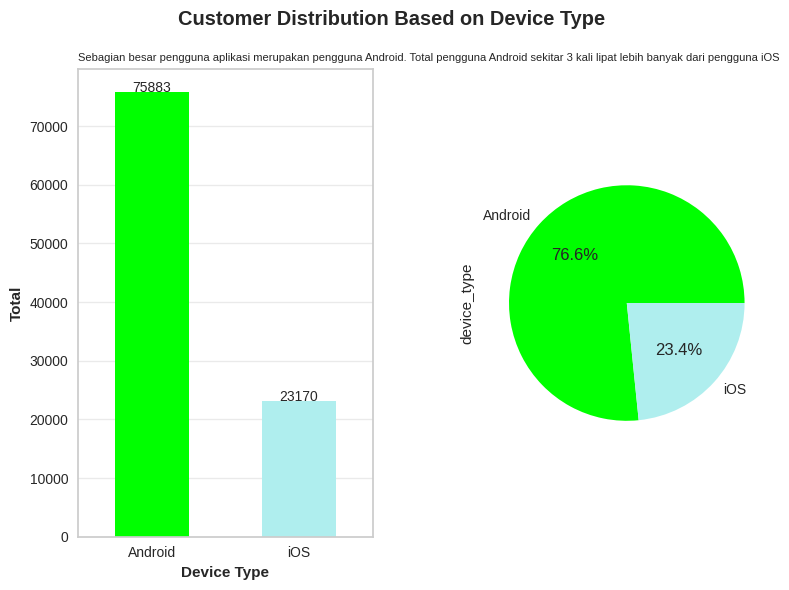

In [ ]:
# Menghitung total masing-masing device type
devicetype_counts = customer['device_type'].value_counts()
#print(devicetype_counts)

# Menghitung persentase masing-masing device type
devicetype_percentages = customer['device_type'].value_counts(normalize=True) * 100
#print(devicetype_percentages)

# Menampilkan hasil dalam bentuk grafik
plt.figure(figsize=(8, 6))

# Plot bar chart untuk total device type
plt.subplot(1, 2, 1)
chart = devicetype_counts.plot(kind='bar', color=['lime', 'paleturquoise'])

for rect in chart.patches:
    chart.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+2,rect.get_height(),
             horizontalalignment='center', fontsize=10)

plt.suptitle('Customer Distribution Based on Device Type', fontweight='heavy')
plt.title('Sebagian besar pengguna aplikasi merupakan pengguna Android. Total pengguna Android sekitar 3 kali lipat lebih banyak dari pengguna iOS', fontsize='8', loc='left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.xlabel('Device Type', fontweight='bold')
plt.ylabel('Total', fontweight='bold')

# Plot pie chart untuk persentase device type
plt.subplot(1, 2, 2)
devicetype_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lime', 'paleturquoise'])

plt.tight_layout()
plt.show()

## Top 5 Customer Location

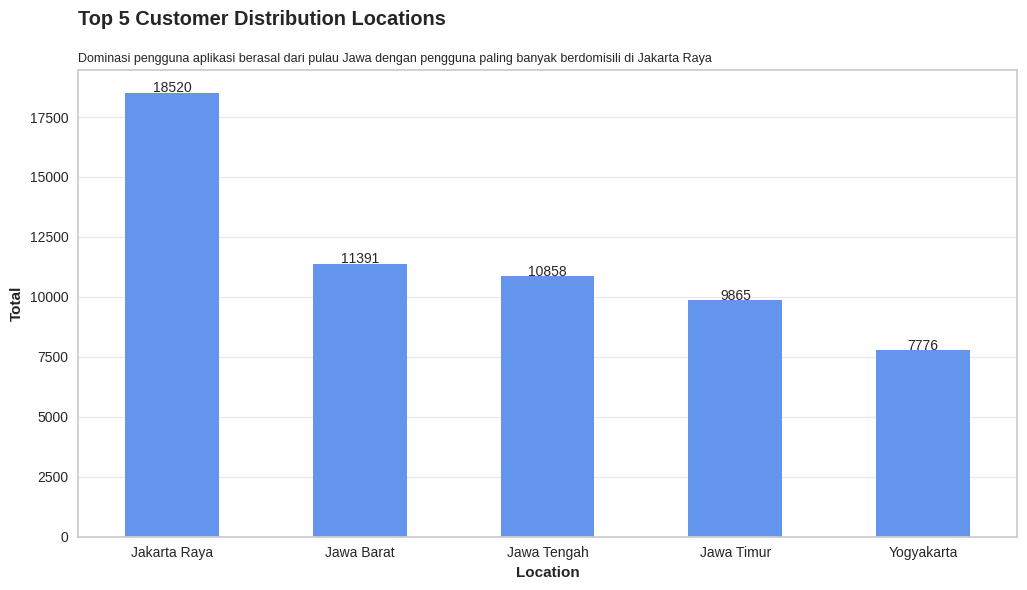

In [ ]:
# Menghitung total masing-masing location
top_location = customer['home_location'].value_counts().head(5)
#print(top_location)

# Menampilkan hasil dalam bentuk grafik
plt.figure(figsize=(20, 6))

# Plot bar chart untuk total location
plt.subplot(1,2,1)
chart = top_location.plot(kind='bar', color='cornflowerblue')

for rect in chart.patches:
    chart.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+2,rect.get_height(),
             horizontalalignment='center', fontsize=10)

plt.suptitle('Top 5 Customer Distribution Locations', fontweight='heavy', x=0.135, y=0.98,)
plt.title('Dominasi pengguna aplikasi berasal dari pulau Jawa dengan pengguna paling banyak berdomisili di Jakarta Raya', fontsize='9', loc='left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.xlabel('Location', fontweight='bold')
plt.ylabel('Total', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Mengkonversi tipe data object menjadi datetime
customer['birth_year'] = pd.to_datetime(customer['birthdate']).dt.year
customer.head(3)

,customer_id,full_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,birth_year
0,2870,Lala Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,1996
1,8193,Maimunah Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,1993
2,7279,Bakiman Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,1989


## Birthyear Comparison

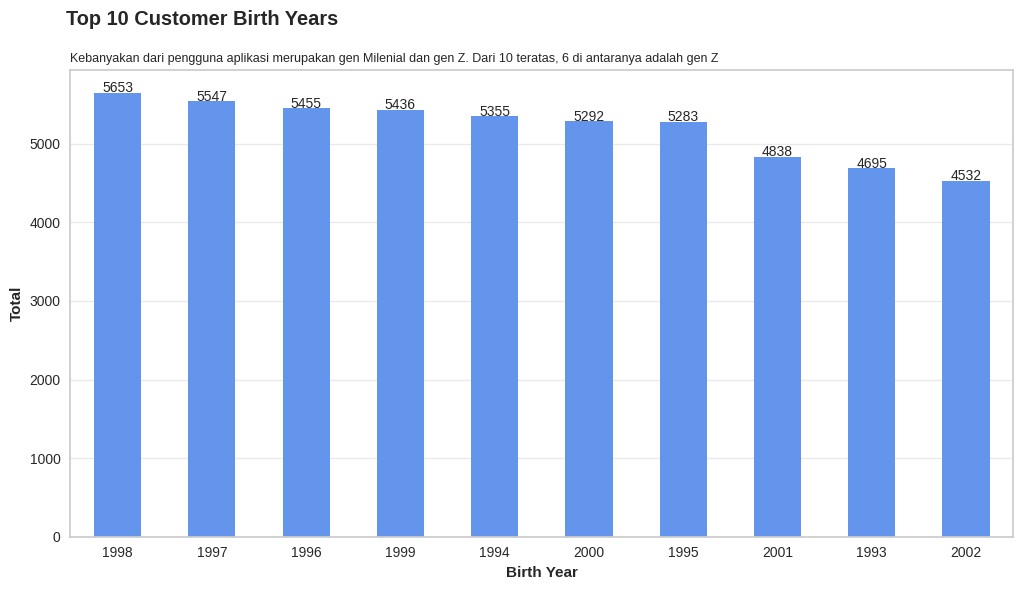

In [ ]:
# Menghitung total masing-masing gender
top_birthyear = customer['birth_year'].value_counts().head(10)
#print(top_birthyear)

# Menampilkan hasil dalam bentuk grafik
plt.figure(figsize=(20, 6))

# Plot bar chart untuk total gender
plt.subplot(1, 2, 1)
chart = top_birthyear.plot(kind='bar', color='cornflowerblue')

for rect in chart.patches:
    chart.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+2,rect.get_height(),
             horizontalalignment='center', fontsize=10)

plt.suptitle('Top 10 Customer Birth Years', fontweight='heavy', x=0.105, y=0.98)
plt.title('Kebanyakan dari pengguna aplikasi merupakan gen Milenial dan gen Z. Dari 10 teratas, 6 di antaranya adalah gen Z', fontsize='9', loc='left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.xlabel('Birth Year', fontweight='bold')
plt.ylabel('Total', fontweight='bold')

plt.tight_layout()
plt.show()

## Customer Growth by Year

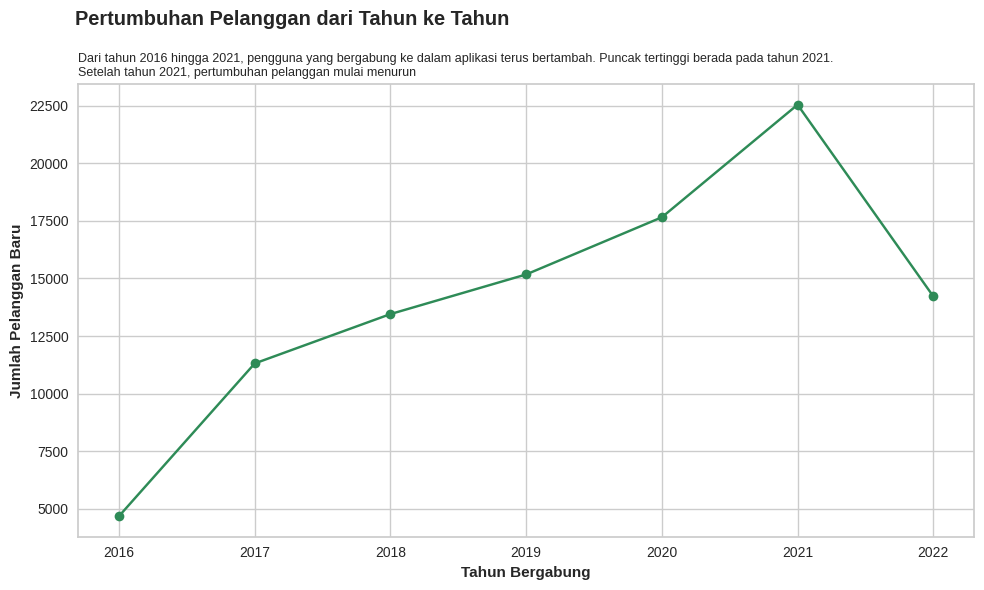

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah pelanggan baru per tahun
customer_growth = customer.groupby(customer['first_join_date'].dt.year)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 6))
customer_growth.plot(kind='line', marker='o', color='seagreen')
plt.suptitle('Pertumbuhan Pelanggan dari Tahun ke Tahun', fontweight='heavy', x=0.300)
plt.title('Dari tahun 2016 hingga 2021, pengguna yang bergabung ke dalam aplikasi terus bertambah. Puncak tertinggi berada pada tahun 2021.\nSetelah tahun 2021, pertumbuhan pelanggan mulai menurun', fontsize='9', loc='left')
plt.xlabel('Tahun Bergabung', fontweight='bold')
plt.ylabel('Jumlah Pelanggan Baru', fontweight='bold')
plt.grid(True)

# Menampilkan line chart
plt.tight_layout()
plt.show()

## Most visit by daytime

In [ ]:
most_daytime = click['event_time_day'].value_counts()


fig = px.bar(most_daytime,
             x=most_daytime.index,
             y=most_daytime.values,
             color=most_daytime.index,
             title='Most timeapp by Daytime',
             text_auto='.2s',
             width=700,
             height=600)

fig.update_layout(
    xaxis_title = 'Daytime',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()


Sebagian besar pengguna menggunakan aplikasi di sore dan pagi hari.

## Most Visit by Day Name

In [ ]:
most_dayname = click['event_time_dayofweek_name'].value_counts()


fig = px.bar(most_dayname,
             x=most_dayname.index,
             y=most_dayname.values,
             color=most_dayname.index,
             title='Most timeapp by Day',
             text_auto='.2s',
             width=700,
             height=600)

fig.update_layout(
    xaxis_title = 'Day',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Pengguna lebih sering menggunakan aplikasi di weekend daripada weekdays.

## Top 10 Product by Sub Category

In [ ]:
product_sub = product['subCategory'].value_counts().head(10)

fig = px.bar(product_sub,
             x=product_sub.index,
             y=product_sub.values,
             color=product_sub.index,
             title='Top 10 Product by Sub Category',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Product',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Kategori Topwear mendominasi Sub Category sebagai kategori dengan produk yang paling banyak dijual di aplikasi.

## Top Product by Master Category

In [ ]:
product_master = product['masterCategory'].value_counts()

fig = px.bar(product_master,
             x=product_master.index,
             y=product_master.values,
             color=product_master.index,
             title='Top Product by Master Category',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Product',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Sebagian besar produk yang dijual pada aplikasi adalah pakaian (apparel).

## Top Product by Article Type

In [ ]:
product_article = product['articleType'].value_counts().head(10)

fig = px.bar(product_article,
             x=product_article.index,
             y=product_article.values,
             color=product_article.index,
             title='Top Product by Article Type',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Product',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Aplikasi lebih banyak menawarkan produk kaos (Tshirt) kepada pengguna dibandingkan dengan produk lainnya.

## Top Product Usage

In [ ]:
product_usage = product['usage'].value_counts()

fig = px.bar(product_usage,
             x=product_usage.index,
             y=product_usage.values,
             color=product_usage.index,
             title='Top Product Usage',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Product Usage',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Hampir seluruh produk yang ditawarkan oleh aplikasi adalah produk casual.

## Payment Method

In [ ]:
payment = transactions['payment_method'].value_counts()

fig = px.bar(payment,
             x=payment.index,
             y=payment.values,
             color=payment.index,
             title='Payment Method',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Payment Method',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Kebanyakan pengguna lebih memilih menggunakan credit card sebagai metode pembayaran mereka.

## Join App Year

In [ ]:
# get year
join_date = customer['first_join_date'].apply(lambda x: x.year).value_counts()

fig = px.bar(join_date,
             x=join_date.index,
             y=join_date.values,
             color=join_date.index,
             title='customer Join by Year',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Join Year',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Tahun 2021 menjadi tahun dengan jumlah pengguna baru yang bergabung dengan aplikasi terbanyak dalam 7 tahun terakhir.

## Promo Usage

In [ ]:
promo = transactions['promo_code'].value_counts()

fig = px.bar(promo,
             x=promo.index,
             y=promo.values,
             color=promo.index,
             title='Promo',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Promo Code Usage',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
   textfont_size=10,
   textangle=0,
   textposition="outside",
   cliponaxis=False)

fig.show()

Sebagian besar pengguna tidak menggunakan kode promo ketika melakukan pembelian.

## Product by Season

In [ ]:
product_season= product['season'].value_counts()

fig = px.bar(product_season,
             x=product_season.index,
             y=product_season.values,
             color=product_season.index,
             title='Top Product by Season',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Season',
    yaxis_title = 'Total',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Produk yang ditawarkan pada aplikasi dominan produk yang cocok untuk musim panas.

## Top 10 customer Home Location Distribution




In [ ]:
home_loc = customer['home_location'].value_counts().sort_values(ascending=False).head(10)

fig = px.pie(
    home_loc,
    values = home_loc.values,
    names = home_loc.index,
    title = 'Customer home Location Distribution',
    width=800,
    height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')


fig.show()

Pulau Jawa menjadi domisili dengan pengguna aplikasi terbanyak diikuti dengan pulau Kalimantan dan Sumatera.

## Gender distribution by product Base Color

In [ ]:
prod_color = product['baseColour'].value_counts()
men = product.loc[product['gender'] == 'Men', 'gender']
women = product.loc[product['gender'] == 'Women', 'gender']

fig = go.Figure(data = [
    go.Bar(name='Men', x=prod_color.index, y=men.index),
    go.Bar(name='Women', x=prod_color.index, y=women.index)])

fig.update_layout(barmode='group')
fig.show()

Ketersediaan produk untuk wanita di berbagai variasi warna lebih banyak daripada produk untuk pria. 10 warna teratas termasuk ke dalam warna-warna earth-tone.

## Payment Status

In [ ]:
payment = transactions['payment_status'].value_counts()

fig = px.bar(payment,
             x=payment.index,
             y=payment.values,
             color=payment.index,
             title='Payment Status',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Payment Status',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

Hampir seluruh pembayaran yang dilakukan oleh pembeli berhasil.

## Traffic Source

In [ ]:
cust_traffic = click['traffic_source'].value_counts().sort_values(ascending=False).head(10)

fig = px.pie(
    cust_traffic,
    values = cust_traffic.values,
    names = cust_traffic.index,
    title = 'Transaction Traffic Distribution',
    width=600,
    height=400)

fig.update_traces(textposition='inside', textinfo='percent+label')


fig.show()

Hampir seluruh pembeli melakukan transaksi secara mobile.

# Merging Data

In [ ]:
product.rename(columns = {'id':'product_id'}, inplace = True)

In [ ]:
df = pd.merge(customer, transactions, on = 'customer_id')
df = df.merge(right = product, on = 'product_id', how = 'inner')
df = df.merge(right = click, on = 'session_id', how = 'inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11726192 entries, 0 to 11726191
Data columns (total 50 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   customer_id                int64         
 1   full_name                  object        
 2   username                   object        
 3   email                      object        
 4   gender_x                   object        
 5   birthdate                  datetime64[ns]
 6   device_type                object        
 7   device_id                  object        
 8   device_version             object        
 9   home_location_lat          float64       
 10  home_location_long         float64       
 11  home_location              object        
 12  home_country               object        
 13  first_join_date            datetime64[ns]
 14  birth_year                 int64         
 15  created_date               object        
 16  booking_id                 object 

In [ ]:
df.rename(columns = {'created_date':'transactions_created', 'gender_x':'customer_gender', 'gender_y':'product_gender'}, inplace = True)

In [ ]:
cols_drop = df[['shipment_location_lat', 'shipment_location_long']]
df.drop(columns=cols_drop, inplace=True)

# Feature Engineering

## Feature Total Transactions Per Customer

In [ ]:
data = df.sort_values(by='transactions_created',ascending=True)
total_transaction = data.drop_duplicates(subset=['booking_id']).groupby(['customer_id'])[['booking_id']].count().sort_values(by='booking_id', ascending=False)
total_transaction.reset_index(inplace=True)
total_transaction = total_transaction.rename(columns = {'booking_id' : 'total_transaction'})

In [ ]:
total_transaction.head()

,customer_id,total_transaction
0,43202,417
1,82237,379
2,29496,376
3,10167,366
4,69740,351


In [ ]:
df = df.merge(right=total_transaction, how='left', on='customer_id')

## Feature Using Promo

In [ ]:
def promo(x):
  if x == 'none':
    return 0
  else:
    return 1
df['using_promo'] = df['promo_code'].apply(promo)

In [ ]:
df['using_promo'].value_counts()

0    6604627
1    5121565
Name: using_promo, dtype: int64

## Feature Age

In [ ]:
date = dt.datetime.now()
year = date.year
age = [year - df.birthdate[i].year for i in range(len(df.birthdate))]
df['age'] = age

In [ ]:
drop_age = df.pop('age')
df.insert(6, 'age', drop_age)

## Feature Age Category

In [ ]:
def usia(x):
  if x > 40:
    return 'orang_tua'
  elif x <= 40 and x >= 20:
    return 'dewasa'
  elif x < 20 and x >= 15:
    return 'remaja'
  else:
    return 'anak_anak'

df['age_cat'] = df['age'].apply(usia)

In [ ]:
drop_cat = df.pop('age_cat')
df.insert(7, 'age_cat', drop_cat)

## Feature Spent Status

In [ ]:
df['total_amount'].quantile([.25, .50, .75])

0.25    205418.0
0.50    311308.0
0.75    559579.0
Name: total_amount, dtype: float64

In [ ]:
def pay_stat(x):
  if x > 559579.0:
    return 'high_payment'
  elif x >= 311308.0 and x <= 559579.0:
    return 'mid_payment'
  else:
    return 'low_payment'
df['spent_status'] = df['total_amount'].apply(pay_stat)

## Feature total year join

In [ ]:
date = dt.datetime.now()
year = date.year
total_join = [year - df.first_join_date[i].year for i in range(len(df.first_join_date))]
df['total_year_join'] = total_join

In [ ]:
drop_join = df.pop('total_year_join')
df.insert(14, 'total_year_join', drop_join)

## Feature First Activity

In [ ]:
first_activity = df.drop_duplicates(subset=['customer_id'], keep='first').groupby(['customer_id'])[['transactions_created']].min()
first_activity.reset_index(inplace=True)
first_activity = first_activity.rename(columns = {'transactions_created' : 'first_activity'})

In [ ]:
df = df.merge(right=first_activity, how='left', on='customer_id')

## Feature last activity

In [ ]:
last_activity = df.drop_duplicates(subset=['customer_id'], keep='last').groupby(['customer_id'])[['transactions_created']].max()
last_activity.reset_index(inplace=True)
last_activity = last_activity.rename(columns = {'transactions_created' : 'last_activity'})

In [ ]:
df = df.merge(right=last_activity, how='left', on='customer_id')

In [ ]:
df['last_activity_year'] = df['last_activity'].apply(lambda x: x.year)

## Feature Order Status

In [ ]:
df['total_transaction'].quantile([0.25, 0.50, 0.75])

0.25    17.0
0.50    39.0
0.75    74.0
Name: total_transaction, dtype: float64

In [ ]:
def order_stat(x):
  if x > 74.0:
    return 'high_order'
  elif x >= 39.0 and x <= 74.0:
    return 'mid_order'
  else:
    return 'low_order'
df['order_status'] = df['total_transaction'].apply(order_stat)

## Feature Top Season Product

In [ ]:
season = df.groupby(['customer_id'])[['season']].value_counts()
top_season = season.groupby('customer_id').idxmax()
top_season = top_season.apply(lambda x: x[1])
top_season = top_season.reset_index(name='prefered_season_product')

In [ ]:
df = df.merge(right=top_season, how='left', on='customer_id')

## Feature Prefered Product

In [ ]:
cat = df.groupby(['customer_id'])[['masterCategory']].value_counts()
top_cat = cat.groupby('customer_id').idxmax()
top_cat = top_cat.apply(lambda x: x[1])
top_cat = top_cat.reset_index(name='prefered_cat')

In [ ]:
df = df.merge(right=top_cat, how='left', on='customer_id')

## Feature Prefered Payment Method

In [ ]:
payment = df.groupby(['customer_id'])[['payment_method']].value_counts()
top_payment_method = payment.groupby('customer_id').idxmax()
top_payment_method = top_payment_method.apply(lambda x: x[1])
top_payment_method = top_payment_method.reset_index(name='prefered_payment_method')

In [ ]:
df = df.merge(right=top_payment_method, how='left', on='customer_id')

## Feature Prefered Time Access

In [ ]:
daytime = df.groupby(['customer_id'])[['event_time_day']].value_counts()
top_daytime = daytime.groupby('customer_id').idxmax()
top_daytime = top_daytime.apply(lambda x: x[1])
top_daytime = top_daytime.reset_index(name='prefered_time_access')

In [ ]:
df = df.merge(right=top_daytime, how='left', on='customer_id')

## Average Activities per Year

In [ ]:
df['event_time_full_date'] = pd.to_datetime(df['event_time_full_date'])
activities_per_year = df.groupby([df['customer_id'], df['event_time_full_date'].dt.year]).size()
average_frequency = activities_per_year.groupby(level=0).mean().round(1)
average_frequency = average_frequency.reset_index(name='year_avg_activity')

In [ ]:
df = df.merge(right=average_frequency, how='left', on='customer_id')

In [ ]:
df.sample()

,customer_id,full_name,username,email,customer_gender,birthdate,age,age_cat,device_type,device_id,...,spent_status,first_activity,last_activity,last_activity_year,order_status,prefered_season_product,prefered_cat,prefered_payment_method,prefered_time_access,year_avg_activity
11084863,74458,Opan Mustofa,81953059-3e87-472b-8948-4bfe59cb06d6,81953059_3e87_472b_8948_4bfe59cb06d6@zakyfound...,M,1996-06-04,27,dewasa,Android,59acc4d0-316e-45d6-91ec-d6e068821b92,...,mid_payment,2018-07-19,2020-04-09,2020,low_order,Summer,Apparel,Credit Card,night,50.2


# Prep Before Modelling

## Drop Irrelevan Columns

In [ ]:
final_drop = df[['username', 'email', 'device_id', 'device_version', 'transactions_created', 'booking_id', 'session_id', 'payment_method', 'payment_status', 'promo_code',
                 'shipment_limit_date', 'shipment_fee', 'product_id', 'quantity', 'item_price', 'product_gender', 'masterCategory', 'subCategory', 'articleType',
                 'baseColour', 'season', 'product_year', 'usage', 'productDisplayName', 'event_name', 'event_id', 'traffic_source', 'event_time_year', 'event_time_month',
                 'event_time_date', 'event_time_month_name', 'event_time_full_date', 'event_time_dayofweek_name', 'event_time_hour', 'event_time_day', 'birth_year']]

In [ ]:
df.drop(columns=final_drop, axis=1, inplace=True)

## Reformat Columns

In [ ]:
date_cols = df[['first_activity', 'last_activity', 'first_join_date', 'birthdate']]

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

## Feature Churn Status

In [ ]:
df['total_amount'].quantile([.25, .50, .75])

0.25    191731.00
0.50    275374.00
0.75    414099.75
Name: total_amount, dtype: float64

In [ ]:
df['total_transaction'].quantile([.25, .50, .75])

0.25     2.0
0.50     5.0
0.75    15.0
Name: total_transaction, dtype: float64

In [ ]:
df['last_activity_year'].value_counts()

2021    14263
2022    13820
2020     8242
2019     5173
2018     3242
2017     2024
2016      596
Name: last_activity_year, dtype: int64

In [ ]:
def churn_definition(x,y,z):
  if x > 2021 and y >= 191731.00 and z >= 2:
    return 'no'
  else:
    return 'yes'

df['churn_stat'] = df.apply(lambda x: churn_definition(x['last_activity_year'], x['total_amount'], x['total_transaction']), axis=1)

In [ ]:
df.drop('last_activity_year', axis=1, inplace=True)

## Check Imbalance Data

In [ ]:
payment = df['churn_stat'].value_counts()

fig = px.bar(payment,
             x=payment.index,
             y=payment.values,
             color=payment.index,
             title='Churn Status',
             text_auto='.2s',
             width=1000,
             height=600)

fig.update_layout(
    xaxis_title = 'Churn Status',
    yaxis_title = 'Values',
    showlegend = True)

fig.update_traces(
    textposition='outside')

fig.show()

## Final Prep

In [ ]:
drop_totalyr = df.pop('total_year_join')
df.insert(13, 'total_year_join', drop_totalyr)

In [ ]:
drop_promo = df.pop('promo_amount')
df.insert(13, 'promo_amount', drop_promo)

In [ ]:
drop_spent = df.pop('spent_status')
df.insert(15, 'spent_status', drop_spent)

In [ ]:
drop_order = df.pop('order_status')
df.insert(17, 'order_status', drop_order)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47360 entries, 0 to 47359
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              47360 non-null  int64         
 1   full_name                47360 non-null  object        
 2   customer_gender          47360 non-null  object        
 3   birthdate                47360 non-null  datetime64[ns]
 4   age                      47360 non-null  int64         
 5   age_cat                  47360 non-null  object        
 6   device_type              47360 non-null  object        
 7   home_location_lat        47360 non-null  float64       
 8   home_location_long       47360 non-null  float64       
 9   home_location            47360 non-null  object        
 10  home_country             47360 non-null  object        
 11  first_join_date          47360 non-null  datetime64[ns]
 12  total_year_join          47360 n

In [ ]:
df_train = df.copy()

In [ ]:
df_date = df_train.select_dtypes(include='datetime')
df_train.drop('full_name', axis=1, inplace=True)
df_train.drop(columns=df_date, axis=1, inplace=True)

## Feature Encoding

In [ ]:
le = LabelEncoder()
df_obj = df_train.select_dtypes(include='object')

for col in df_obj:
  df_train[col] = le.fit_transform(df_train[col])

In [ ]:
train_drop = df_train[['customer_id', 'home_location_lat', 'home_location_long']]
df_train.drop(columns=train_drop, axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47360 entries, 0 to 47359
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_gender          47360 non-null  int64  
 1   age                      47360 non-null  int64  
 2   age_cat                  47360 non-null  int64  
 3   device_type              47360 non-null  int64  
 4   home_location            47360 non-null  int64  
 5   home_country             47360 non-null  int64  
 6   total_year_join          47360 non-null  int64  
 7   promo_amount             47360 non-null  int64  
 8   total_amount             47360 non-null  int64  
 9   spent_status             47360 non-null  int64  
 10  total_transaction        47360 non-null  int64  
 11  order_status             47360 non-null  int64  
 12  using_promo              47360 non-null  int64  
 13  prefered_season_product  47360 non-null  int64  
 14  prefered_cat          

## Split and Balancing Data

In [ ]:
x = df_train.drop(['churn_stat'], axis=1)
y = df_train['churn_stat']

In [ ]:
sm = SMOTEENN(random_state=42)
x,y = sm.fit_resample(x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

0    22572
1    20508
Name: churn_stat, dtype: int64

# Modelling Clasification

## Base Model

In [ ]:
des_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gaussian = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
extra_tree = ExtraTreesClassifier(random_state=42)
hist = HistGradientBoostingClassifier(random_state=42)
ad_boost = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
logistic = LogisticRegression(random_state=42)
catboost = CatBoostClassifier(verbose=False, random_state=42)


model_pipeline = [des_tree, random_forest, gaussian, knn, svm, grad, extra_tree, hist, ad_boost, xgb, lgbm, logistic, catboost]

model_list = ['Decission Tree', 'Random Forest', 'Gaussian', 'KNN', 'SVM', 'Gradient', 'Extra Tree', 'Hist Boost', 'Ada Boost', 'XGB', 'LGBM', 'Logistic', 'catboost']

In [ ]:
def modeltrain():
    acc_train = []
    acc_test = []
    recall = []
    precission = []
    roc_auc_score = []
    f1_score = []
    for model in model_pipeline:
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      acc_train.append(model.score(x_train, y_train))
      acc_test.append(model.score(x_test, y_test))
      recall.append(metrics.recall_score(y_test, y_pred))
      precission.append(metrics.precision_score(y_test, y_pred))
      roc_auc_score.append(metrics.roc_auc_score(y_test, y_pred))
      f1_score.append(metrics.f1_score(y_test, y_pred))
    result_df = pd.DataFrame({'Model' : model_list,
                              'Acc Train' : acc_train,
                              'Acc Test' : acc_test,
                              'Recall' : recall,
                              'Precission' : precission,
                              'ROC AUC' : roc_auc_score,
                              'F1 Score': f1_score})
    result_df = result_df.sort_values(by='F1 Score', ascending=False)
    return result_df

In [ ]:
result = modeltrain()
result

[LightGBM] [Info] Number of positive: 16383, number of negative: 18081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 34464, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475366 -> initscore=-0.098617
[LightGBM] [Info] Start training from score -0.098617


,Model,Acc Train,Acc Test,Recall,Precission,ROC AUC,F1 Score
9,XGB,0.975395,0.941968,0.920727,0.956434,0.941103,0.938241
12,catboost,0.967038,0.941968,0.917333,0.959675,0.940965,0.938027
7,Hist Boost,0.956360,0.941156,0.915152,0.960071,0.940096,0.937073
10,LGBM,0.957869,0.940576,0.917091,0.956995,0.939619,0.936618
1,Random Forest,1.000000,0.940692,0.912485,0.961676,0.939542,0.936435
5,Gradient,0.938487,0.933612,0.905455,0.953536,0.932465,0.928873
6,Extra Tree,1.000000,0.931871,0.921455,0.935285,0.931446,0.928318
8,Ada Boost,0.933612,0.930246,0.897455,0.954124,0.928910,0.924922
3,KNN,0.966023,0.929201,0.892848,0.956375,0.927720,0.923521
0,Decission Tree,1.000000,0.910399,0.900364,0.911411,0.909990,0.905854


## Cross Validation

In [ ]:
# set kfold
skf = StratifiedKFold(5, random_state=42, shuffle=True)

In [ ]:
def cvmodel() :
  acc_train = []
  acc_test = []
  recall = []
  precission = []
  roc_auc_score = []
  f1_score = []
  for model in model_pipeline:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_train.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy').mean())
    acc_test.append(cross_val_score(model, x_test, y_test, cv=skf, scoring='accuracy').mean())
    recall.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='recall').mean())
    precission.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='precision').mean())
    roc_auc_score.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='roc_auc').mean())
    f1_score.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='f1').mean())
  cv_df = pd.DataFrame({'Model' : model_list,
                            'Acc Train' : acc_train,
                            'Acc Test' : acc_test,
                            'Recall' : recall,
                            'Precission' : precission,
                            'ROC AUC' : roc_auc_score,
                            'F1 Score': f1_score})
  cv_df = cv_df.sort_values(by='F1 Score', ascending=False)
  return cv_df

In [ ]:
cv_result = cvmodel()
cv_result

[LightGBM] [Info] Number of positive: 16383, number of negative: 18081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 34464, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475366 -> initscore=-0.098617
[LightGBM] [Info] Start training from score -0.098617
[LightGBM] [Info] Number of positive: 13106, number of negative: 14465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 27571, number of used features: 17
[LightGBM] [Info] 

,Model,Acc Train,Acc Test,Recall,Precission,ROC AUC,F1 Score
12,catboost,0.942955,0.935933,0.920588,0.957769,0.988759,0.938798
9,XGB,0.941620,0.930014,0.922358,0.953315,0.988625,0.937577
1,Random Forest,0.940895,0.930710,0.913935,0.959804,0.986361,0.936302
10,LGBM,0.940518,0.934773,0.917597,0.955515,0.988022,0.936166
7,Hist Boost,0.940024,0.932451,0.916865,0.955171,0.987855,0.935619
5,Gradient,0.935469,0.930710,0.908075,0.953961,0.985486,0.930446
6,Extra Tree,0.931610,0.911444,0.922114,0.933243,0.981495,0.927638
8,Ada Boost,0.931668,0.928505,0.902215,0.951525,0.983228,0.926209
3,KNN,0.919481,0.799791,0.876702,0.950069,0.973161,0.911903
0,Decission Tree,0.915158,0.897168,0.909357,0.911945,0.914885,0.910634


## Hyperparameter Tuning

### Xgboost

In [ ]:
model = XGBClassifier(random_state=42)

param_xgb = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

xgboost = GridSearchCV(model, param_xgb, scoring='f1', cv=skf)
xgboost.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='f1')

In [ ]:
print(f'Best param : {xgboost.best_params_}')
print(f'Best score : {xgboost.best_score_}')

Best param : {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 1.0}
Best score : 0.9441271584756106


### Catboost

In [ ]:
clf = CatBoostClassifier()
params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring='f1', cv=skf)
clf_grid.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x78c6c3af1ea0>,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss', 'CrossEntropy'],
                         'random_seed': [42]},
             scoring='f1')

In [ ]:
print(f'Best param : {clf_grid.best_params_}')
print(f'Best score : {clf_grid.best_score_}')

Best param : {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'logging_level': 'Silent', 'loss_function': 'Logloss', 'random_seed': 42}
Best score : 0.9361469030017547


### Random Forest

In [ ]:
random_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

random_forest = RandomForestClassifier(random_state=42)
random_grid = GridSearchCV(random_forest, random_param, scoring='f1', cv=skf)
random_grid.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='f1')

In [ ]:
print(f'Best param : {random_grid.best_params_}')
print(f'Best score : {random_grid.best_score_}')

Best param : {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
Best score : 0.9362419706994011


## Final Score

In [ ]:
cat_param = {'depth': 6,
             'iterations': 500,
             'l2_leaf_reg': 1e-20,
             'leaf_estimation_iterations': 10,
             'logging_level': 'Silent',
             'loss_function': 'Logloss',
             'random_seed': 42}

xgb_param = {'colsample_bytree': 0.7,
             'gamma': 0,
             'learning_rate': 0.1,
             'max_depth': 10,
             'min_child_weight': 1,
             'n_estimators': 500,
             'subsample': 1.0}

random_param = {'bootstrap': True,
                'max_depth': 80,
                'max_features': 3,
                'min_samples_leaf': 3,
                'min_samples_split': 8,
                'n_estimators': 100}

In [ ]:
catboost = CatBoostClassifier(**cat_param)
xgb = XGBClassifier(**xgb_param, random_state=42)
random_forest = RandomForestClassifier(**random_param, random_state=42)

final_model = [catboost, xgb, random_forest]
final_list = ['Catboost', 'XGBoost', 'Random Forest']

In [ ]:
def finalmodel() :
  acc_train = []
  acc_test = []
  recall = []
  precission = []
  roc_auc_score = []
  f1_score = []
  for model in final_model:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_train.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy').mean())
    acc_test.append(cross_val_score(model, x_test, y_test, cv=skf, scoring='accuracy').mean())
    recall.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='recall').mean())
    precission.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='precision').mean())
    roc_auc_score.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='roc_auc').mean())
    f1_score.append(cross_val_score(model, x_train, y_train, cv=skf, scoring='f1').mean())
  final_result = pd.DataFrame({'Model' : final_list,
                            'Acc Train' : acc_train,
                            'Acc Test' : acc_test,
                            'Recall' : recall,
                            'Precission' : precission,
                            'ROC AUC' : roc_auc_score,
                            'F1 Score': f1_score})
  final_result = final_result.sort_values(by='F1 Score', ascending=False)
  return final_result

In [ ]:
final = finalmodel()
final

,Model,Acc Train,Acc Test,Recall,Precission,ROC AUC,F1 Score
1,XGBoost,0.944725,0.934308,0.925288,0.957007,0.989518,0.940871
0,Catboost,0.940895,0.936049,0.916804,0.957055,0.987816,0.936485
2,Random Forest,0.938748,0.931871,0.911310,0.957793,0.985096,0.933965


## Confusion Matrix

In [ ]:
df['total_amount'].mean().round()

378409.0

In [ ]:
y_test.value_counts()

0    4491
1    4125
Name: churn_stat, dtype: int64

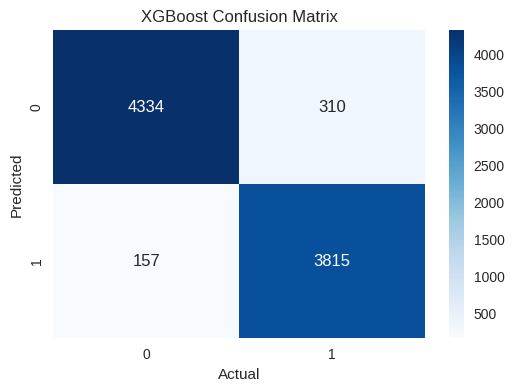

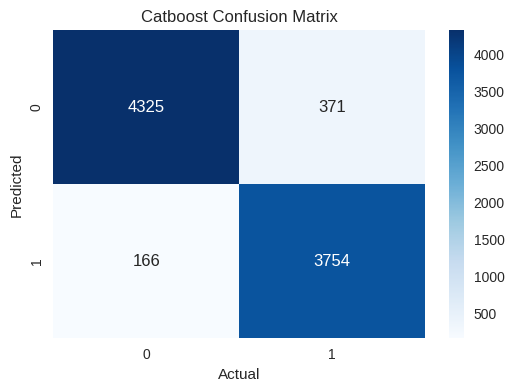

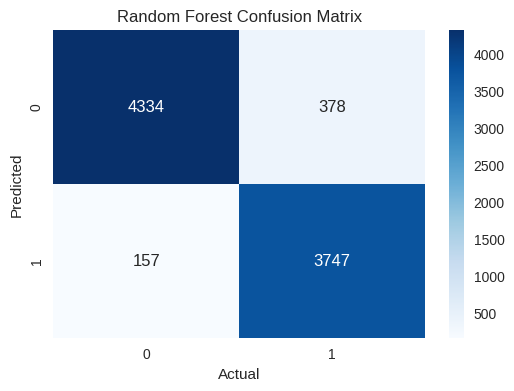

In [ ]:
models = {
    'XGBoost' : XGBClassifier(**xgb_param, random_state=42),
    'Catboost' : CatBoostClassifier(**cat_param),
    'Random Forest' : RandomForestClassifier(**random_param, random_state=42)}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred).T
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

## Feature Importance

In [ ]:
fmodel = XGBClassifier(**xgb_param, random_state=42)
fmodel.fit(x_train, y_train)

importances = fmodel.feature_importances_
importances = pd.DataFrame({'Attribute': x_train.columns, 'Importance': importances})
importances = importances.sort_values(by='Importance', ascending=False)

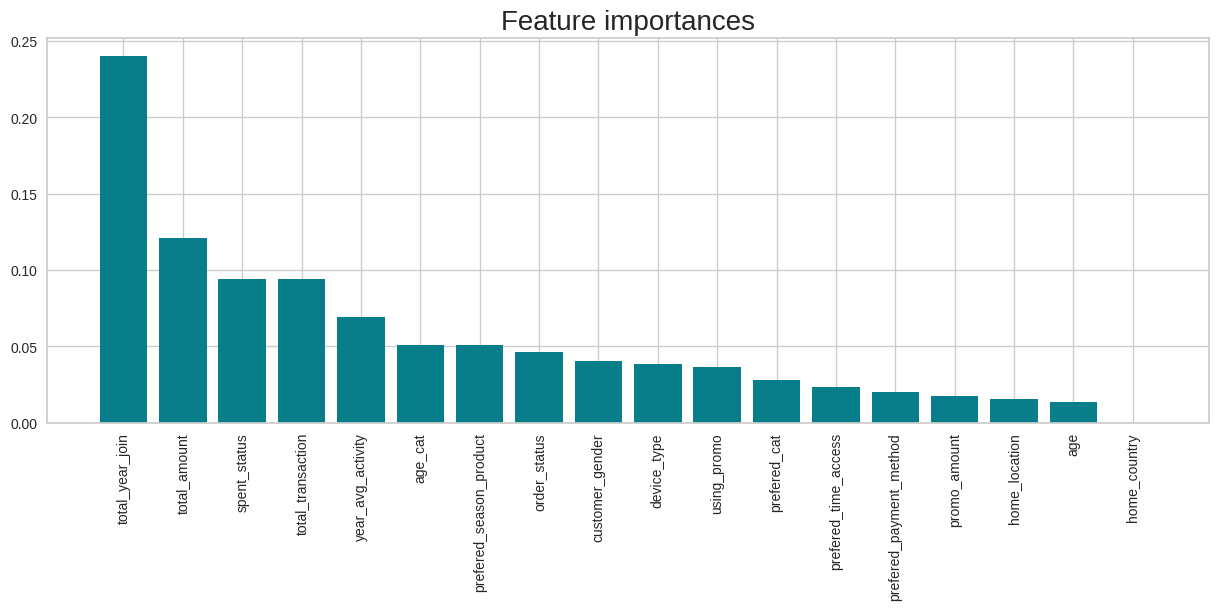

In [ ]:
plt.subplots(figsize=(15, 5))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Modelling Clustering

## Elbow Method for Optimal K

In [ ]:
clus_col = df[['total_amount', 'total_transaction']]

In [ ]:
K = range(1,10)
temp = {}
for k in K :
  km = KMeans(n_clusters=k, max_iter=1000)
  km.fit(clus_col)
  temp[k] = km.inertia_

fig = go.Figure(data= go.Scatter(x=list(temp.keys()), y=list(temp.values()), mode='lines+markers'))
fig.update_layout(title='Elbow Method For Optimal k',
                  xaxis=dict(title='Number of clusters (k)'),
                  yaxis=dict(title='Sum of Squared Distances'),
                  showlegend=True,
                  width=900,
                  height=500)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

## k means VS k medoid

In [ ]:
scaler = MinMaxScaler()
clus_scale = scaler.fit_transform(clus_col)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans_pred = kmeans.fit_predict(clus_scale)
kmeans_score = silhouette_score(clus_scale, kmeans_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmedoids = KMedoids(n_clusters=3, metric='euclidean')
kmedoids_pred = kmedoids.fit_predict(clus_scale)
kmedoids_score = silhouette_score(clus_scale, kmedoids_pred)

In [ ]:
print(f'K Means score : {kmeans_score}')
print(f'K Medoids score: {kmedoids_score}')

K Means score : 0.673069055901723
K Medoids score: 0.35517706535379917


## K means Modelling

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clus_scale)
df['customer_seg'] = kmeans.predict(clus_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df.groupby('customer_seg')['total_transaction'].describe()

,count,mean,std,min,25%,50%,75%,max
customer_seg,,,,,,,,
0,40925.0,7.989884,9.162023,1.0,2.0,4.0,11.0,43.0
1,3112.0,16.875643,20.511875,1.0,4.0,10.0,22.0,192.0
2,3323.0,77.236834,40.206199,41.0,51.0,64.0,88.0,417.0


In [ ]:
df.groupby('customer_seg')['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
customer_seg,,,,,,,,
0,40925.0,2.995325e+05,160449.862382,19630.0,185920.0,261974.0,370978.00,886169.0
1,3112.0,1.448580e+06,585800.352808,847694.0,1035800.0,1257332.0,1652143.25,5117331.0
2,3323.0,3.476058e+05,225995.853080,26577.0,194896.0,283292.0,428478.00,2245465.0


In [ ]:
df['customer_seg'].value_counts()

0    40940
2     3313
1     3107
Name: customer_seg, dtype: int64

In [ ]:
fig = px.scatter(df, x='total_amount', y='total_transaction', color='customer_seg')
fig.update_layout(scattermode="group", scattergap=0.75)
fig.show()

# Final Data

In [ ]:
def segmentation(x):
  if x == 0:
    return 'Bronze Member'
  elif x == 2:
    return 'Gold Member'
  else:
    return 'Platinum Member'

df['customer_seg'] = df['customer_seg'].apply(segmentation)

In [ ]:
df.head()

,customer_id,full_name,customer_gender,birthdate,age,age_cat,device_type,home_location_lat,home_location_long,home_location,...,first_activity,last_activity,order_status,prefered_season_product,prefered_cat,prefered_payment_method,prefered_time_access,year_avg_activity,churn_stat,customer_seg
0,7279,Bakiman Simanjuntak,M,1989-01-23,34,dewasa,iOS,-8.631607,116.428436,Nusa Tenggara Barat,...,2020-08-31,2022-07-29,mid_order,Summer,Apparel,LinkAja,evening,359.0,no,Gold Member
1,84898,Indra Halim,M,1978-09-05,45,orang_tua,Android,-6.258877,106.862237,Jakarta Raya,...,2021-06-21,2021-06-21,low_order,Fall,Accessories,LinkAja,evening,26.0,yes,Bronze Member
2,26982,Aisyah Yulianti,F,1993-10-22,30,dewasa,Android,-7.789120,111.508859,Jawa Timur,...,2021-05-07,2021-08-03,mid_order,Summer,Apparel,LinkAja,evening,424.7,yes,Gold Member
3,60711,Mahmud Marbun,M,1980-02-01,43,orang_tua,Android,1.102261,109.537473,Kalimantan Barat,...,2020-10-16,2019-04-18,mid_order,Summer,Apparel,Credit Card,evening,122.8,yes,Bronze Member
4,37418,Ian Jailani,M,2004-07-19,19,remaja,Android,0.959359,112.479448,Kalimantan Barat,...,2020-07-30,2019-02-24,high_order,Summer,Apparel,Debit Card,morning,168.3,yes,Gold Member


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47360 entries, 0 to 47359
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              47360 non-null  int64         
 1   full_name                47360 non-null  object        
 2   customer_gender          47360 non-null  object        
 3   birthdate                47360 non-null  datetime64[ns]
 4   age                      47360 non-null  int64         
 5   age_cat                  47360 non-null  object        
 6   device_type              47360 non-null  object        
 7   home_location_lat        47360 non-null  float64       
 8   home_location_long       47360 non-null  float64       
 9   home_location            47360 non-null  object        
 10  total_year_join          47360 non-null  int64         
 11  home_country             47360 non-null  object        
 12  first_join_date          47360 n

In [ ]:
df.year_avg_activity.max()

1921.0

In [ ]:
#df.to_csv('final-data-v2.csv', index=False)

# Export Model

In [ ]:
model = XGBClassifier(**xgb_param, random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
joblib.dump(model, 'model-xgboost.joblib')

['model-xgboost.joblib']

In [ ]:
x_train.columns

Index(['customer_gender', 'age', 'age_cat', 'device_type', 'home_location',
       'home_country', 'total_year_join', 'promo_amount', 'total_amount',
       'spent_status', 'total_transaction', 'order_status', 'using_promo',
       'prefered_season_product', 'prefered_cat', 'prefered_payment_method',
       'prefered_time_access', 'year_avg_activity'],
      dtype='object')

In [ ]:
model_cluster = KMeans(n_clusters=3)
model_cluster.fit(clus_col)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
joblib.dump(model_cluster, 'model-kmeans.joblib')

['model-kmeans.joblib']